# Color Threshold ( Blue Screen )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
image = cv2.imread('images/pizza_bluescreen.jpg')

print('This image is: ',type(image),' with Dimension: ',image.shape)

This image is:  <class 'numpy.ndarray'>  with Dimension:  (514, 816, 3)


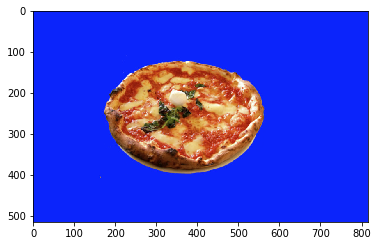

In [8]:
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

Define the color threshold

In [21]:
# Defining our color selection boundaries in RGB values

lower_blue = np.array([0,0,230])
upper_blue = np.array([50,50,255])

Creating a mask

In [22]:
# Defining the mask area
mask = cv2.inRange(image_copy,lower_blue,upper_blue)
# if the image areas falls under the limit(lower_blue,upper_blue) then mask will show it otherwise it will turn the other 
# area black

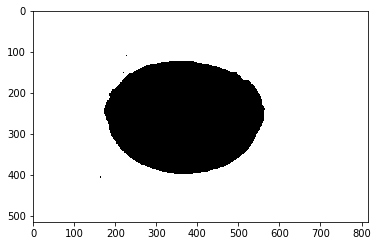

In [23]:
plt.imshow(mask,cmap='gray')

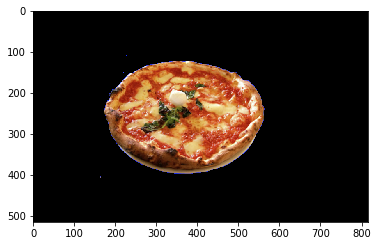

In [24]:
# Mask the image to let the pizza show through

masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0,0,0]

plt.imshow(masked_image)

Mask and add a background image

In [28]:
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)

# Croping the backgroud_image to the right size (514x816)
background_image = background_image[0:514,0:816]

# Mask the cropped background so that the pizza area is blocked
background_image[mask == 0] = [0,0,0]

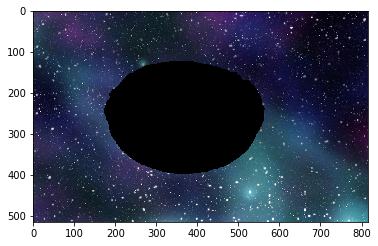

In [29]:
plt.imshow(background_image)

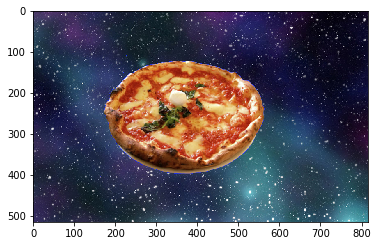

In [30]:
# Add two images together to complete the image

complete_image = background_image + masked_image

plt.imshow(complete_image)